In [135]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import r2_score
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [84]:
data = pd.read_csv('abalone.csv')

In [85]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [86]:
# Преобразуем признак Sex в числовой

data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [87]:
X, y = data.drop('Rings', axis=1), data['Rings']

In [109]:
RFR = RandomForestRegressor(random_state=1)
estimators_grid = list(range(1, 51))
kf = KFold(n=y.size, n_folds=5, shuffle=True, random_state=1)
r2_score_list = []

In [110]:
for estimator in tqdm(estimators_grid):
    RFR = RandomForestRegressor(n_estimators=estimator, random_state=1)
    y_true = []
    y_pred = []
    for train_index, test_index in kf:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        RFR.fit(X_train, y_train)
        y_true = list(map(lambda x: float(x), y_test.values))
        y_pred = list(RFR.predict(X_test))
        y_true.extend(list(map(lambda x: float(x), y_test.values)))
        y_pred.extend(list(RFR.predict(X_test)))
    r2_score_list.append(r2_score(y_true=y_true, y_pred=y_pred))
    
    
        
        

In [133]:
# Запись ответа (нужно усроднять значение на кросс-валидации, хотя это не совсем правильно)
output1 = open('week5_1.txt', 'w')
print(
    r2_score_list.index(min(list(filter(lambda x: x > 0.52, r2_score_list)))) + 2,
    file=output1, 
    end='', 
    sep=' '
)
output1.close()

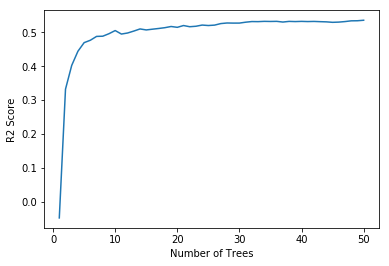

In [125]:
# Посомтрим на изменение качества по мере роста числа деревьев

plt.plot(estimators_grid, r2_score_list)
plt.ylabel('R2 Score')
plt.xlabel('Number of Trees')
plt.show()